<a href="https://colab.research.google.com/github/Nishanaziya/DSML/blob/master/knn_lung_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [ ]:
df = pd.read_csv('/content/lungcancer.csv')
df = df.drop(["Name","Surname"], axis =1)

In [ ]:
x = df.drop("Result", axis =1)

In [ ]:
y = df["Result"]

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.2, random_state = 20)


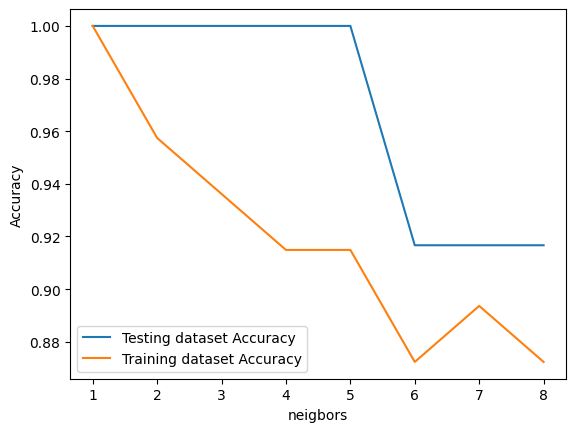

In [16]:
neighbors = np.arange(1,9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train,y_train)
  train_accuracy[i] = knn.score (x_train, y_train)
  test_accuracy[i] = knn.score (x_test,y_test)

plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')

plt.legend()
plt.xlabel('neigbors')
plt.ylabel('Accuracy')
plt.show()


In [17]:
KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [18]:
accuracy = knn.score(x_test, y_test)
print("accuracy: ",accuracy)

accuracy:  0.9166666666666666


In [19]:
y_predict = knn.predict(x_test)

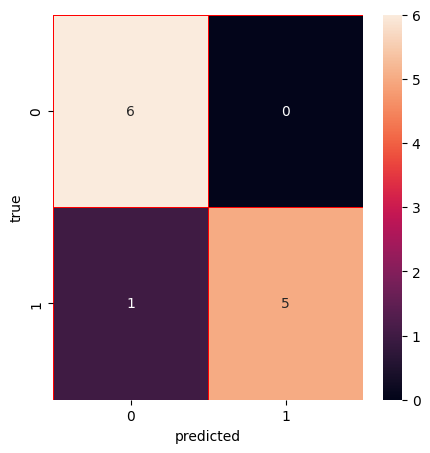

In [23]:
cm = confusion_matrix(y_test, y_predict)

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot=True, linewidth =0.5, linecolor="red", fmt="d", ax=ax)
plt.xlabel("predicted")
plt.ylabel("true")
plt.show()

In [42]:
user_age = float(input("Enter Age: "))
user_smokes = int(input("Enter Smokes: "))
user_areaq = float(input("Enter AreaQ: "))
user_alkhol = float(input("Enter Alkhol: "))
user_input_data = pd.DataFrame({'Age': [user_age], 'Smokes': [user_smokes], 'AreaQ': [user_areaq], 'Alkhol': [user_alkhol]})



Enter Age: 60
Enter Smokes: 50
Enter AreaQ: 5
Enter Alkhol: 9


In [43]:
user_predictions = knn.predict(user_input_data)

In [44]:
if user_predictions[0] == 1:
    print("The model predicts that the user may have lung cancer.")
else:
    print("The model predicts that the user may not have lung cancer.")

The model predicts that the user may have lung cancer.
